# Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **prove** it?

![Equator](Images/equatorsign.png)

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.

## MY OBSERVATIONS:
1. As you approach the equator, it does get warmer, but interestingly, based on the "Latitude vs Temperature" visualization, seems the latitude with the highest temperature overall is around the 20 to 40-degree latitude. This includes the tip of South America to the lower half of North America. 
2. With regards to cloudiness, from the Equator to about 20-degrees, there's a higher concentration of cities that get cloudy, whereas, latitudes -20 to -40 and 20 to 40 see a higher concentration of cities with 0% cloudiness. 
3. There's a higher concentration of cities with high humidity around the 40 to 60-degree range

In [85]:
# Import dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys_2 import api_key

# Import citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [120]:
api_key

'191e119d9fe681def2b657ccb3458d81'

### Generate Cities List

In [102]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city id = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If city is unique, add it to the cities list
    if city not in cities:
        cities.append(city)

DOUBLE CHECK: Print the city count and city names to confirm sufficient count & working properly
len(cities)
print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [75]:
# Configuration information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Query URL
query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city

Test to see what info is pulled
portland_test = requests.get(query_url).json()
portland_test

In [115]:
# Store in dictionaries
city_dict = []

print("---PROCESSING---")

for city in cities:
    print(f"Weather data for city: {city}")
    query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city    
    # Checks if the request code is good or bad
    request = requests.get(query_url)
    
    # To ensure it keeps going even after bad request code, use the if/else
    if request.status_code == 200:
        
        # Unpack json data from request object
        city_data = request.json()
        
        simple_data = {
            "City": city_data["name"],
            "Cloudiness": city_data["clouds"]["all"],
            "Country": city_data["sys"]["country"],
            "Date": city_data["dt"],
            "Humidity": city_data["main"]["humidity"],
            "Lat": city_data["coord"]["lat"],
            "Lng": city_data["coord"]["lon"],
            "Max Temp": city_data["main"]["temp_max"],
            "Wind Speed": city_data["wind"]["speed"],
            "City ID": city_data["id"]
        }
        
        # Store it in the list
        city_dict.append(simple_data)
    else:
        print(f"No data for city: {city}")
print("---FINISHED---")

---PROCESSING---
Weather data for city: avarua
Weather data for city: burla
Weather data for city: mandalgovi
Weather data for city: ushuaia
Weather data for city: east london
Weather data for city: winnemucca
Weather data for city: lithgow
Weather data for city: rikitea
Weather data for city: hobart
Weather data for city: tura
Weather data for city: padang
Weather data for city: berlevag
Weather data for city: robertsport
Weather data for city: mataura
Weather data for city: sao filipe
Weather data for city: atuona
Weather data for city: port elizabeth
Weather data for city: sentyabrskiy
No data for city: sentyabrskiy
Weather data for city: butaritari
Weather data for city: kodinar
Weather data for city: saint anthony
Weather data for city: hilo
Weather data for city: bambous virieux
Weather data for city: hermanus
Weather data for city: kozhva
Weather data for city: saint-philippe
Weather data for city: vaini
Weather data for city: barrow
Weather data for city: sinnamary
Weather data

Weather data for city: constitucion
Weather data for city: makat
Weather data for city: witu
Weather data for city: tsihombe
No data for city: tsihombe
Weather data for city: baykit
Weather data for city: houlton
Weather data for city: palm beach
Weather data for city: cabo san lucas
Weather data for city: devonport
Weather data for city: brae
Weather data for city: georgetown
Weather data for city: iqaluit
Weather data for city: nenjiang
Weather data for city: darhan
Weather data for city: zeya
Weather data for city: alyangula
Weather data for city: sangmelima
Weather data for city: itarema
Weather data for city: asau
No data for city: asau
Weather data for city: abu samrah
Weather data for city: pangnirtung
Weather data for city: soligalich
Weather data for city: bayshore gardens
Weather data for city: acapulco
Weather data for city: ichinohe
Weather data for city: merauke
Weather data for city: el jicaro
Weather data for city: alta floresta
Weather data for city: acuitzio
Weather da

Weather data for city: hobyo
Weather data for city: bougouni
Weather data for city: kahului
Weather data for city: guerrero negro
Weather data for city: rafraf
Weather data for city: assiniboia
Weather data for city: capitao poco
Weather data for city: mecca
Weather data for city: tiarei
Weather data for city: svetlogorsk
Weather data for city: bani
Weather data for city: zastron
Weather data for city: poso
Weather data for city: shemonaikha
Weather data for city: vilhena
Weather data for city: shahdol
Weather data for city: tuatapere
Weather data for city: kavaratti
Weather data for city: port lincoln
Weather data for city: auki
Weather data for city: kualakapuas
Weather data for city: porto novo
Weather data for city: halalo
No data for city: halalo
Weather data for city: swidnik
Weather data for city: gamba
Weather data for city: hambantota
Weather data for city: yuancheng
No data for city: yuancheng
Weather data for city: laishevo
Weather data for city: carauari
Weather data for ci

In [105]:
city_dict

[{'City': 'Avarua',
  'Cloudiness': 93,
  'Country': 'CK',
  'Date': 1563682497,
  'Humidity': 68,
  'Lat': -21.21,
  'Lng': -159.78,
  'Max Temp': 71.6,
  'Wind Speed': 10.29,
  'City ID': 4035715},
 {'City': 'Burla',
  'Cloudiness': 0,
  'Country': 'RU',
  'Date': 1563682498,
  'Humidity': 56,
  'Lat': 53.34,
  'Lng': 78.33,
  'Max Temp': 74.75,
  'Wind Speed': 5.99,
  'City ID': 1508636},
 {'City': 'Mandalgovi',
  'Cloudiness': 92,
  'Country': 'MN',
  'Date': 1563682498,
  'Humidity': 27,
  'Lat': 45.76,
  'Lng': 106.27,
  'Max Temp': 80.33,
  'Wind Speed': 7.81,
  'City ID': 2030065},
 {'City': 'Ushuaia',
  'Cloudiness': 0,
  'Country': 'AR',
  'Date': 1563682221,
  'Humidity': 69,
  'Lat': -54.81,
  'Lng': -68.31,
  'Max Temp': 33.8,
  'Wind Speed': 5.82,
  'City ID': 3833367},
 {'City': 'East London',
  'Cloudiness': 0,
  'Country': 'ZA',
  'Date': 1563682499,
  'Humidity': 70,
  'Lat': -33.02,
  'Lng': 27.91,
  'Max Temp': 46.4,
  'Wind Speed': 8.05,
  'City ID': 1006984},
 {'C

### Convert Raw Data to DataFrame
* Export the city data into a csv
* Display the DataFrame

In [106]:
city_data_df = pd.DataFrame(city_dict)
city_data_df.head()

,City,City ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Avarua,4035715,93,CK,1563682497,68,-21.21,-159.78,71.60,10.29
1,Burla,1508636,0,RU,1563682498,56,53.34,78.33,74.75,5.99
2,Mandalgovi,2030065,92,MN,1563682498,27,45.76,106.27,80.33,7.81
3,Ushuaia,3833367,0,AR,1563682221,69,-54.81,-68.31,33.80,5.82
4,East London,1006984,0,ZA,1563682499,70,-33.02,27.91,46.40,8.05


In [107]:
# Export to csv
city_data_df.to_csv("output_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

##### Latitude vs. Temperature Scatterplot
* Title = City Latitude vs. Max Temperature (date)
* x = "Latitude"
* y = "Max Temperature (F)"

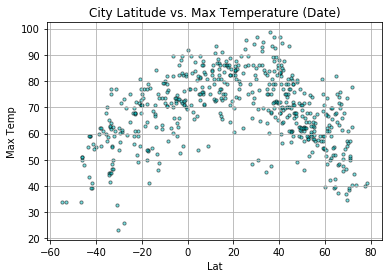

In [108]:
city_data_df.plot.scatter(x="Lat", y="Max Temp", c='darkturquoise', s=10, edgecolor="black", alpha=0.5)
plt.grid()
plt.title("City Latitude vs. Max Temperature (Date)")
plt.savefig("LATvsTEMP.png")

#### Latitude vs. Humidity Scatterplot
* Title = City Latitude vs. Humidity (date)
* x = "Latitude"
* y = "Humidity (%)"

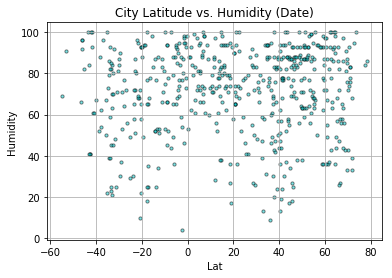

In [109]:
city_data_df.plot.scatter(x="Lat", y="Humidity", c='darkturquoise', s=10, edgecolor="black", alpha=0.5)
plt.grid()
plt.title("City Latitude vs. Humidity (Date)")
plt.savefig("LATvsHUM.png")

#### Latitude vs. Cloudiness Scatterplot
* Title = City Latitude vs. Cloudiness (date)
* x = "Latitude"
* y = "Cloudiness (%)"

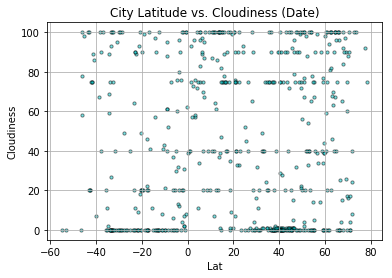

In [110]:
city_data_df.plot.scatter(x="Lat", y="Cloudiness", c='darkturquoise', s=10, edgecolor="black", alpha=0.5)
plt.grid()
plt.title("City Latitude vs. Cloudiness (Date)")
plt.savefig("LATvsCLOUD.png")

#### Latitude vs. Wind Speed Scatterplot
* Title = City Latitude vs. Wind Speed (date)
* x = "Latitude"
* y = "Wind Speed (mph)"

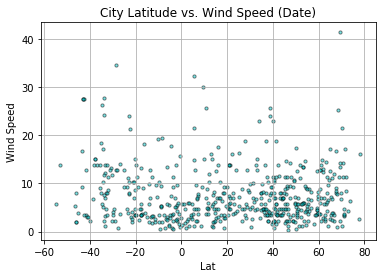

In [111]:
city_data_df.plot.scatter(x="Lat", y="Wind Speed", c='darkturquoise', s=10, edgecolor="black", alpha=0.5)
plt.grid()
plt.title("City Latitude vs. Wind Speed (Date)")
plt.savefig("LATvsWIND.png")